In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [2]:
df=pd.read_excel("scaled-schiller.xls")

In [3]:
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),Schiller
0,-1.038563,0.905429,-0.715109,-0.898163,-0.295999,-0.202021,-0.570927,-0.245209,-0.292857,0
1,-1.391796,-0.919610,-1.073500,-0.898163,-0.295999,-0.202021,-0.570927,-0.245209,-0.292857,0
2,0.845342,-0.919610,0.001671,-0.898163,-0.295999,-0.202021,-0.570927,-0.245209,-0.292857,0
3,2.964736,1.513776,-0.356719,1.244442,8.821219,16.547162,0.270597,-0.245209,-0.292857,0
4,2.258271,0.297083,1.435231,1.244442,-0.295999,-0.202021,3.636693,-0.245209,-0.292857,0
...,...,...,...,...,...,...,...,...,...,...
853,0.845342,0.297083,0.360061,-1.612364,-0.295999,-0.202021,-0.570927,-0.245209,-0.292857,0
854,0.609854,-0.311264,0.718451,-0.898163,-0.295999,-0.202021,1.673137,-0.245209,-0.292857,0
855,-0.214355,-0.311264,0.001671,-1.612364,-0.295999,-0.202021,-0.548486,-0.245209,-0.292857,0
856,0.727598,-0.311264,2.510402,-0.183961,-0.295999,-0.202021,-0.548486,-0.245209,-0.292857,0


In [4]:
#Turn dataframe into values
df_array=df.drop(columns='Schiller').values

In [5]:
df_array

array([[-1.03856336e+00,  9.05429457e-01, -7.15109408e-01, ...,
        -5.70926728e-01, -2.45209271e-01, -2.92857071e-01],
       [-1.39179566e+00, -9.19610028e-01, -1.07349952e+00, ...,
        -5.70926728e-01, -2.45209271e-01, -2.92857071e-01],
       [ 8.45342268e-01, -9.19610028e-01,  1.67081637e-03, ...,
        -5.70926728e-01, -2.45209271e-01, -2.92857071e-01],
       ...,
       [-2.14354647e-01, -3.11263533e-01,  1.67081637e-03, ...,
        -5.48486090e-01, -2.45209271e-01, -2.92857071e-01],
       [ 7.27598166e-01, -3.11263533e-01,  2.51040160e+00, ...,
        -5.48486090e-01, -2.45209271e-01, -2.92857071e-01],
       [ 2.56621760e-01, -3.11263533e-01,  1.07684115e+00, ...,
        -4.30672736e-01, -2.45209271e-01, -2.92857071e-01]])

## Splitting the dataset

Ratio 0.75:0.25, train: test

In [6]:
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(df_array,df.Schiller,test_size=0.25,random_state=5)

## Import all the learning algorithms we want to test

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Prepare an array with all the algorithms

In [8]:
models = []
models.append(('LR',LogisticRegression(solver='saga',multi_class='ovr')))
models.append(('KNN',KNeighborsClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

## Import some utilities of sklearn to compare algorithms

In [9]:
from sklearn import  model_selection
from sklearn.metrics import classification_report #Reporting metric
from sklearn.metrics import confusion_matrix #Confusion_matrix Reporting
from sklearn.metrics import accuracy_score #Accuracy calculating

In [10]:
# Prepare the configuration to run the test
results=[]
names=[]
seed=7

## Evaluate each model in turn and save the performance result

In [11]:
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(+/-%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

LR:0.906635(+/-0.028947)
KNN:0.901995(+/-0.025302)
LDA:0.892572(+/-0.038781)
NB:0.831971(+/-0.045713)
SVM:0.908197(+/-0.026688)


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

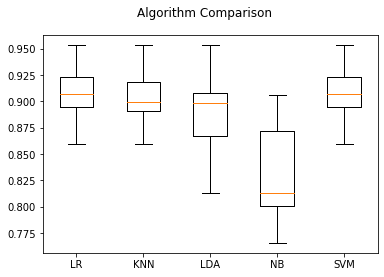

In [12]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

SVM best perfomed

## BUILDING BEST MODEL

In [14]:
svm=SVC(probability=True)

In [15]:
# Use the whole dataset to train the model
X = np.append(X_train, X_test, axis=0)
Y = np.append(Y_train, Y_test, axis=0)

In [16]:
# Train the model
svm.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Saving model to disk

In [17]:
import pickle

In [18]:
pickle.dump(svm, open("model-schiller.pkl","wb"))

### Loading model to check

In [19]:
model = pickle.load(open("model-schiller.pkl","rb"))

In [20]:
model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)